In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def generate_dataset():
    x_batch = np.linspace(0, 2, 100)
    y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
    # plt.scatter(x_batch, y_batch)
    # plt.show()
    return x_batch, y_batch

In [3]:
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None,), name='x')
    y = tf.placeholder(tf.float32, shape=(None,), name='y')

    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name='W')
        b = tf.Variable(np.random.normal(), name='b')
        y_pred = tf.add(tf.multiply(w, x), b)

        loss = tf.reduce_mean(tf.square(y_pred - y))
    return x, y, y_pred, loss

In [4]:
def run():
    x_batch, y_batch = generate_dataset()
    x, y, y_pred, loss = linear_regression()

    optimizer = tf.train.GradientDescentOptimizer(0.1)
    train_op = optimizer.minimize(loss)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        feed_dict = {x: x_batch, y: y_batch}
        # The feed_dict argument allows the caller to override the value of the tensors (scalar, string, list, numpy
        # array or tf.placeholder e.g. x and y) in the graph.

        for i in range(10):  # epoch
            session.run(train_op, feed_dict)
            print(i, "loss:", loss.eval(feed_dict))

        print('Predicting')
        y_pred_batch = session.run(y_pred, {x: x_batch})
        # using session.run() but this time, the fetches will be y_pred instead of train_op and we only need to feed in
        # x. We do this because W and b are already trained and the predicted y can be computed with just x.

    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch, color='red')
    plt.show()

0 loss: 0.18778679
1 loss: 0.1600446
2 loss: 0.14680213
3 loss: 0.13843012
4 loss: 0.13185835
5 loss: 0.1260976
6 loss: 0.12081943
7 loss: 0.11590585
8 loss: 0.1113065
9 loss: 0.10699324
Predicting


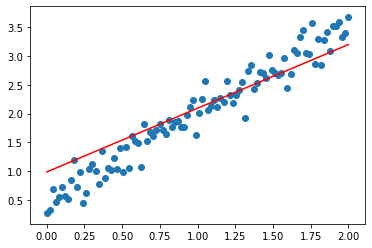

In [5]:
run()